# Extraccion de palabras y frases

Una de las técnicas más simples pero más poderosas para extraer información importante de documentos de texto no estructurados es la extracción de frases clave. Se define como el proceso o la técnica de extraer términos o frases clave importantes y relevantes de un cuerpo de texto no estructurado, de modo que los temas o temas centrales del documento o documentos de texto se capturen en estos documentos clave

Esta técnica pertenece a técnicas de extracción de información. La extracción de frases clave encuentra su uso en muchas áreas, incluidas las siguientes:

- Semántica
- Motores de búsqueda basados en consultas
- Sistemas de recomendación
- Sistemas de etiquetado
- Similitud de documentos
- Traducción

La extracción de frases clave suele ser el punto de partida para llevar a cabo tareas más complejas en análisis de texto o NLP, y el resultado de esto puede actuar como características para sistemas más complejos. Hay varios enfoques para la extracción de frases clave. Cubriremos las siguientes dos técnicas:

- Colocaciones (Collocations)
- Extracción de frases basada en etiquetas ponderadas (Weighted tag-based plhrase extraction)

## Colocaciones

El término colocación es en realidad un concepto tomado del análisis de corpus y la lingüística. **Es una secuencia o grupo de palabras que tienden a ocurrir con frecuencia**, de modo que esta frecuencia tiende a ser más de lo que podría denominarse como una ocurrencia aleatoria. 

Se pueden formar varios tipos de colocaciones en función de las partes del discurso de los diversos términos, como sustantivos, verbos, etc. Hay varias formas de extraer colocaciones, y una de las mejores es utilizar un enfoque de agrupación o segmentación de **n-gramas (n-grams)** en el que utilizando un corpus, contamos la frecuencia de cada n-grama y los clasificamos en función de su frecuencia de ocurrencia.

Veamos como funcionan los n grams:

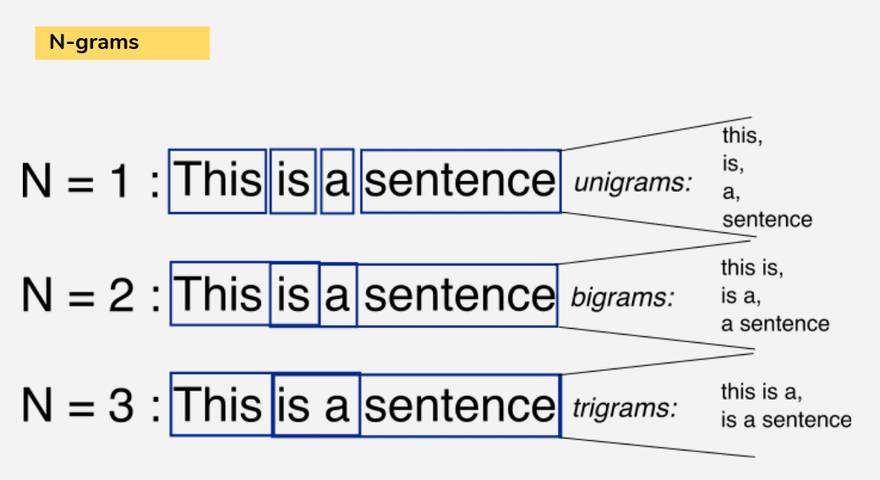

In [127]:
from IPython.display import Image
from IPython.display import display

display(Image(filename='ngrams.gif'))

Vamos a implementar esto desde cero para que lo entiendas y luego si usaremos herramientas de nltk para simplificar el proceso. Vamos a trabajar con un corpus de ejemplo de Gutenberg, "Alicia en el país de las maravillas" de Lewis Carroll como nuestro corpus.

Mira la funcion `text_normalizer.py` esta preparada para realizar lo siguiente:

1. Extraer oraciones
2. Remover secuencias HTML especiales
3. Expandir contracciones
4. Lemmatizar
5. Remover caracteres especiales
6. Remover stopwords

In [129]:
from nltk.corpus import gutenberg
import text_normalizer as tn
import nltk
from operator import itemgetter

In [130]:
# Cargar el corpus
alice = gutenberg.sents(fileids='carroll-alice.txt')
alice = [' '.join(ts) for ts in alice]
norm_alice = list(filter(None, tn.normalize_corpus(alice, text_lemmatization=False)))

In [131]:
print(type(alice))
print(len(alice))
alice[0]

<class 'list'>
1703


"[ Alice ' s Adventures in Wonderland by Lewis Carroll 1865 ]"

In [132]:
norm_alice[0:5]

['alice adventures wonderland lewis carroll',
 'chapter',
 'rabbit hole',
 'alice beginning get tired sitting sister bank nothing twice peeped book sister reading pictures conversations use book thought alice without pictures conversation',
 'considering mind well could hot day made feel sleepy stupid whether pleasure making daisy chain would worth trouble getting picking daisies suddenly white rabbit pink eyes ran close']

Ahora que hemos cargado nuestro corpus, definiremos una función para aplanar el corpus en una gran cadena de texto. La siguiente función nos ayudará a hacer eso para un corpus de documentos:

In [133]:
def flatten_corpus(corpus):
    return ' '.join([document.strip() 
                     for document in corpus])

Definiremos una función para calcular n-gramas en función de alguna lista de entrada de tokens y el parámetro n, que determina el grado del n-grama como un unigrama, bigrama, etc. El siguiente fragmento de código calcula n-gramas para una secuencia de entrada:

In [134]:
def compute_ngrams(sequence, n):
    return list(
            zip(*(sequence[index:] 
                     for index in range(n)))
    )

Esta función básicamente toma una secuencia de tokens y calcula una lista de listas que tienen secuencias donde cada lista contiene todos los elementos de la lista anterior excepto el primer elemento eliminado de la lista anterior. Construye n tales listas y luego las comprime todas juntas para darnos los n-gramas. Podemos ver la función en acción en una secuencia de muestra en el siguiente fragmento:

In [135]:
compute_ngrams([1,2,3,4], 2)

[(1, 2), (2, 3), (3, 4)]

In [138]:
compute_ngrams(['David','soy','yo','si'], 2)

[('David', 'soy'), ('soy', 'yo'), ('yo', 'si')]

La salida anterior muestra bigramas y trigramas para una secuencia de entrada. Ahora utilizaremos esta función y nos basaremos en ella para generar los mejores n-gramas en función de su frecuencia de aparición. El siguiente fragmento de código nos ayuda a obtener el top de n-gramas

In [139]:
def get_top_ngrams(corpus, ngram_val=1, limit=5):

    corpus = flatten_corpus(corpus)
    tokens = nltk.word_tokenize(corpus)

    ngrams = compute_ngrams(tokens, ngram_val)
    ngrams_freq_dist = nltk.FreqDist(ngrams)
    sorted_ngrams_fd = sorted(ngrams_freq_dist.items(), 
                              key=itemgetter(1), reverse=True)
    sorted_ngrams = sorted_ngrams_fd[0:limit]
    sorted_ngrams = [(' '.join(text), freq) 
                     for text, freq in sorted_ngrams]

    return sorted_ngrams

Ahora usamos de la clase FreqDist de nltk para crear un contador de todos los n-gramas en función de su frecuencia y luego los ordenamos en función de su frecuencia y devolvemos los n-gramas superiores en función del límite de usuario especificado. Ahora calcularemos los principales bigramas y trigramas de nuestro corpus utilizando el siguiente fragmento de código:

In [140]:
get_top_ngrams(corpus=norm_alice, ngram_val=2,limit=10)

[('said alice', 123),
 ('mock turtle', 56),
 ('march hare', 31),
 ('said king', 29),
 ('thought alice', 26),
 ('white rabbit', 22),
 ('said hatter', 22),
 ('said mock', 20),
 ('said caterpillar', 18),
 ('said gryphon', 18)]

In [141]:
get_top_ngrams(corpus=norm_alice, ngram_val=3,limit=10)

[('said mock turtle', 20),
 ('said march hare', 10),
 ('poor little thing', 6),
 ('little golden key', 5),
 ('certainly said alice', 5),
 ('white kid gloves', 5),
 ('march hare said', 5),
 ('mock turtle said', 5),
 ('know said alice', 4),
 ('might well say', 4)]

<AxesSubplot:xlabel='0'>

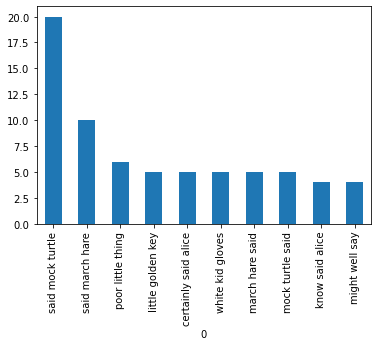

In [142]:
import pandas as pd
pd.DataFrame(get_top_ngrams(corpus=norm_alice, ngram_val=3,limit=10)).set_index(0).plot(kind='bar',legend='')

Bien y ahora que pasa si tenemos el idiona español?. Vamos a trabajar con un ejemplo de datos reales, veamos de que se trata

Veamos datos reales de encuestas a estudiantes y apliquemos el proceso tipico de flujo para obtener los n-grams correspondientes

In [143]:
# Lectura - Database (Formato Excel)
import time
start_time = time.time()
import pandas as pd
data = pd.read_excel('Base_recortada.xlsx').head(100)
print("--- %s seconds ---" % (time.time() - start_time))
data.head() # Visualización de dataset

--- 0.6042091846466064 seconds ---


,id,token,submitdate,lastpage,startlanguage,startdate,datestamp,ipaddr,refurl,sueno
0,281,NaN,2016-06-28 11:55:41,9,es,2016-06-28 11:28:29,2016-06-28 11:55:41,190.65.90.7,http://www.plandecenal.edu.co/cms/,La educación que sueño para el 2025 es una edu...
1,279,NaN,2016-06-28 11:46:43,9,es,2016-06-28 11:23:16,2016-06-28 11:46:43,191.102.216.126,http://www.plandecenal.edu.co/cms/,La educación que yo sueño para COLOMBIA pa...
2,280,NaN,2016-06-28 11:43:42,9,es,2016-06-28 11:27:57,2016-06-28 11:43:42,200.122.243.32,http://www.plandecenal.edu.co/cms/,"SUEÑO CON UNA EDUCACIÓN DE CALIDAD, INCLUSIVA,..."
3,278,NaN,2016-06-28 11:20:29,9,es,2016-06-28 11:11:03,2016-06-28 11:20:29,200.122.243.32,http://www.plandecenal.edu.co/cms/,"EDUCACIÓN SUPERIOR GRATUITA PARA TODOS, QUE EL..."
4,270,NaN,2016-06-28 12:19:50,9,es,2016-06-28 10:06:58,2016-06-28 12:19:50,190.248.55.2,http://www.plandecenal.edu.co/cms/,"Contar con una educación de calidad, equitativ..."


In [144]:
data.shape

(100, 10)

In [38]:
!python -m spacy download es_core_news_md

     ---------------------------------------- 42.3/42.3 MB 4.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


2023-02-11 08:29:10.431429: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-02-11 08:29:10.431490: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-11 08:29:18.112861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2023-02-11 08:29:18.112914: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-11 08:29:18.120396: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-G61012J
2023-02-11 08:29:18.120630: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-G61012J

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip instal

In [145]:
import warnings
import unicodedata
from autocorrect import Speller
import autocorrect
from textblob import Word
from spellchecker import SpellChecker
import spacy
import enchant
import inflector
from nltk.corpus import stopwords
import en_core_web_md
import re
import nltk
from collections import Counter
import sympy
from symspellpy import SymSpell
import string
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

nlp = spacy.load("es_core_news_md")
inflect = inflector.Spanish()
stop_words = stopwords.words('spanish')
spanish = SpellChecker(language='es')  # the default is English (language='en')
warnings.filterwarnings("ignore")
speller = Speller(lang='es')
# Load the dictionary
sym_spell = SymSpell()
corpus_path = 'Dictionaries/diccionario_final_español.txt'
sym_spell.load_dictionary(corpus_path, term_index=1, count_index=0, separator='$')

True

In [146]:
# Two important functions to clean the text message column
def change_plural(text):
        '''Recibe un texto de spacy text y devuelve una lista de palabras en singular'''
        text_list = str(text).split(sep= ' ')
        text_list = [inflect.singularize(word) for word in text_list]
        #text_list = [w.replace('ye', 'yes') for w in text_list] # Caso especial
        new_text = ' '.join(text_list)
        return new_text
    
def david_clean_function_transformers(dataframe, text_col):
    '''
    Input: 
    dataframe= pandas dataframe
    text_col= message with text
    Output:
    df_clean= dataframe with text_col modified according
    '''
    start_time = time.time()  #  begins time 
    ############################################################################
    # Codigo general - DavidBU
    print('-------------------------------------------')
    print('Fase 1: Borrar nulos')
    df = dataframe[dataframe[text_col].notnull()]
    # Reset the index
    df.reset_index(drop=True, inplace=True)
    # Numero de filas removidas
    print(f"Removidas {dataframe.shape[0] - df.shape[0]} filas con nulos en la columna {text_col}.")
    elapsed_time = time.time() - start_time
    print("Tiempo: ", elapsed_time) # Report time for the function
    
    print('-------------------------------------------')
    print('Fase 2: Borrar duplicados')
    # Borrar duplicados
    df_clean = df.drop_duplicates(text_col, keep='last')
    # Numero de filas removidad
    num_removed = df.shape[0] - df_clean.shape[0]
    print(f'Numero de filas removidas: {num_removed}')
    elapsed_time = time.time() - start_time
    print("Tiempo: ", elapsed_time) # Report time for the function
    
    print('-------------------------------------------')
    print('Phase 3: Normalizar a lower case')
    df_clean[text_col] = df_clean[text_col].str.lower()
    elapsed_time = time.time() - start_time
    print("Tiempo: ", elapsed_time) # Report time for the function
    
    print('-------------------------------------------')
    print('Phase 4: Remover caracteres especiales y puntuacion')
    df_clean = df_clean[~df_clean[text_col].str.contains(r'\d')] # remover no numericos
    df_clean[text_col] = df_clean[text_col].astype(str)# Forzar a ser string
    # Quitar carcateres especiales y cosas rara
    df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub('[^a-zA-Z0-9 \n\.]', '', x))
    df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub('\[.*?¿\]\%', '', x)) # remover simbolos raros
    df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation)\
                                                                   , '', x)) #remover puntuación
    df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub('[‘’“”…«»]', '', x))#remover caracteres adicionales
    df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub('\n', '', x))#remover newlines
    elapsed_time = time.time() - start_time
    print("Tiempo: ", elapsed_time) # Report time for the function
    
    print('-------------------------------------------')
    print('Phase 5: Remover numeros entre palabras,comas, comillas, underscore y palabras consecutivas')
    df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub('\w*\d\w*', '', x)) # numeros entre palabras
    try:
        df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub(r'\b(\w+)( \1\b)+', r'\1', '', x))# alfa numericos
    except:
        pass
    df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub(r',', '', x)) # quitar comas
    df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub(r'\-', '', x)) # quitar guiones
    df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub(r'\_', '', x)) # quitar _
    elapsed_time = time.time() - start_time
    print("Tiempo: ", elapsed_time) # Report time for the function
    
    print('-------------------------------------------')
    print('Fase 6: Remover acentos')
    # Reemplzar acentos por normalizaciones
    df_clean[text_col] = df_clean[text_col].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode())
    elapsed_time = time.time() - start_time
    print("Tiempo: ", elapsed_time) # Report time for the function
    
    print('-------------------------------------------')
    print('Fase 7: Remover otros caracteres especiales')
    df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub('\[.*?¿\]\%', '', x))
    df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub('\w*\d\w*', '', x))
    df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub('[‘’“”…«»]', '', x))
    df_clean[text_col] = df_clean[text_col].apply(lambda x: re.sub('\n', '', x))
    elapsed_time = time.time() - start_time
    print("Tiempo elapsed: ", elapsed_time) # Report time for the function
    
    print('-------------------------------------------')
    print('Phase 8: Corregir slang words')
    """Corregir slang words de una columna textual"""
    slang_words = {'niños': 'niño', 'niñas': 'niña', 'educacion': 'educación','suelo':'sueño'}
    df_clean[text_col] = df_clean[text_col].apply(lambda x: ' '.join([slang_words.get(word, word) for word in x.split()]))
    elapsed_time = time.time() - start_time
    print("Tiempo: ", elapsed_time) # Report time for the function
    
    print('-------------------------------------------')
    print('Fase 9: Correcion ortografica Speller')
    # Usando la libraria speller 
    df_clean[text_col] = df_clean[text_col].apply(speller)
    elapsed_time = time.time() - start_time
    print("Tiempo: ", elapsed_time) # Report time for the function
    
    print('-------------------------------------------')
    print('Fase 10: Correcion ortografica Pyspellchecker') # Problems
    # Funcion lambda para correcion
    correct_spelling = lambda x: str.split(str(sym_spell.lookup_compound(x, max_edit_distance=1)[0]), ',')[0]
    # Aplico mi lambda funcition
    df_clean[text_col] = df_clean[text_col].apply(correct_spelling)
    elapsed_time = time.time() - start_time
    print("Time elapsed: ", elapsed_time) # Report time for the function
    
    print('-------------------------------------------')
    print('Fase 11: Remover el percentil inferior 1 del total de palabras')
    token_lists = [word_tokenize(str(each)) for each in df_clean[text_col]]
    tokens = [item for sublist in token_lists for item in sublist]
    # 1 upper percentile
    one_percentile = int(len(set(tokens)) * 0.01)
    # 1 lower percentile
    bottom_1_percentile = Counter(tokens).most_common()[-one_percentile:]
    stop_words.extend([word for word,val in bottom_1_percentile])
    df_clean[text_col]=df_clean[text_col][0:len(df_clean[text_col])].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    # Celdas limpias finales
    df_clean = df_clean[df_clean[text_col].notnull()] # Again we remove empty cells
    # Resetear el indice
    df_clean.reset_index(drop=True, inplace=True)
    elapsed_time = time.time() - start_time
    print("Tiempo: ", elapsed_time) # Report time for the function
    return df_clean

In [147]:
data['sueno']

0     La educación que sueño para el 2025 es una edu...
1     La  educación  que yo sueño  para COLOMBIA  pa...
2     SUEÑO CON UNA EDUCACIÓN DE CALIDAD, INCLUSIVA,...
3     EDUCACIÓN SUPERIOR GRATUITA PARA TODOS, QUE EL...
4     Contar con una educación de calidad, equitativ...
                            ...                        
95    La educación debe estar enfocada hacia Ser Fel...
96    Sueño con unos actores educativos comprometido...
97    Buenos días ,cordial saludo.Soy una mujer de 5...
98    La zona rural debe ser mirada con igualdad com...
99    Las características de un modelo humanista apo...
Name: sueno, Length: 100, dtype: object

In [148]:
df_cleaned_t=david_clean_function_transformers(data, 'sueno')
print(df_cleaned_t.shape)
df_cleaned_t.head()

-------------------------------------------
Fase 1: Borrar nulos
Removidas 1 filas con nulos en la columna sueno.
Tiempo:  0.001996278762817383
-------------------------------------------
Fase 2: Borrar duplicados
Numero de filas removidas: 0
Tiempo:  0.006987810134887695
-------------------------------------------
Phase 3: Normalizar a lower case
Tiempo:  0.009976863861083984
-------------------------------------------
Phase 4: Remover caracteres especiales y puntuacion
Tiempo:  0.01998305320739746
-------------------------------------------
Phase 5: Remover numeros entre palabras,comas, comillas, underscore y palabras consecutivas
Tiempo:  0.03801250457763672
-------------------------------------------
Fase 6: Remover acentos
Tiempo:  0.043051719665527344
-------------------------------------------
Fase 7: Remover otros caracteres especiales
Tiempo elapsed:  0.05756711959838867
-------------------------------------------
Phase 8: Corregir slang words
Tiempo:  0.05956768989562988
----

,id,token,submitdate,lastpage,startlanguage,startdate,datestamp,ipaddr,refurl,sueno
0,280,NaN,2016-06-28 11:43:42,9,es,2016-06-28 11:27:57,2016-06-28 11:43:42,200.122.243.32,http://www.plandecenal.edu.co/cms/,suelo educacion calidad inclusiva equidad llen...
1,278,NaN,2016-06-28 11:20:29,9,es,2016-06-28 11:11:03,2016-06-28 11:20:29,200.122.243.32,http://www.plandecenal.edu.co/cms/,educacion superior gratuita gobierno nacional ...
2,270,NaN,2016-06-28 12:19:50,9,es,2016-06-28 10:06:58,2016-06-28 12:19:50,190.248.55.2,http://www.plandecenal.edu.co/cms/,contar educacion calidad equitativa reconozca ...
3,72,NaN,2016-06-25 11:53:17,9,es,2016-06-25 11:49:01,2016-06-25 11:53:16,201.245.162.114,http://www.plandecenal.edu.co/cms/,educacion debe mas orientada desarrollar conoc...
4,73,NaN,2016-06-25 12:13:54,9,es,2016-06-25 11:57:44,2016-06-25 12:13:54,201.245.162.114,http://www.plandecenal.edu.co/cms/,suelo educacion llegue rincones pas distan cie...


Perfecto ahora entonces vamos a crear los n grams

In [149]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk import ngrams

def plot_ngrams(df, text_col, n, top):
    # Unir todas las palabras
    text = ' '.join(df[text_col].tolist())
    # Generar los n-grams
    n_grams = ngrams(text.split(), n)
    # Convertir los n-grams a tuplas
    n_grams = [tuple(ng) for ng in n_grams]
    # Sacar ña fecuencia de cad n-gram
    n_grams_counts = dict(Counter(n_grams))
    # Convertir a dataframe
    a=pd.DataFrame.from_dict(n_grams_counts,orient='index')
    a.columns=['Conteo']
    a=a.sort_values(by='Conteo',ascending=False)
    # Modificar el indice
    a.index = a.index.map(lambda x: ' '.join(x))
    a= a.head(top)
    return a

df_n_grams=plot_ngrams(df_cleaned_t, 'sueno', 1, 50)
df_n_grams.head()

,Conteo
educacion,146
suelo,57
cien,44
ser,36
calidad,26


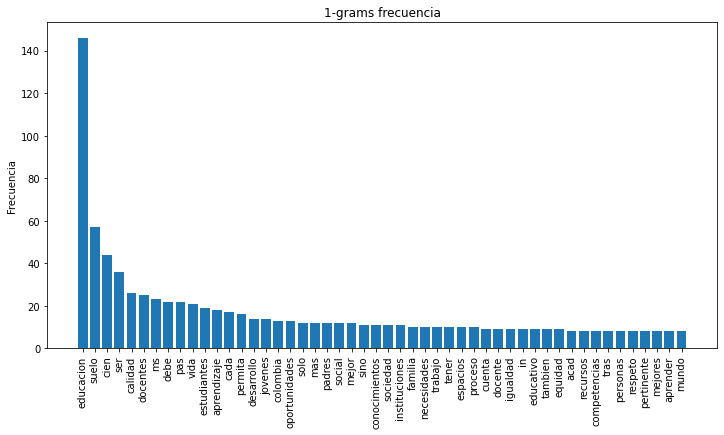

In [150]:
plt.figure(figsize=(12,6))
plt.bar(df_n_grams.index, df_n_grams.Conteo)
plt.xticks(rotation=90)
plt.title('1-grams frecuencia')
#plt.xlabel('2-grams')
plt.ylabel('Frecuencia')
plt.show()

In [151]:
df_n_grams=plot_ngrams(df_cleaned_t, 'sueno', 2, 50)
df_n_grams.head()

,Conteo
suelo educacion,23
educacion calidad,9
debe ser,8
reflex in,7
ser humano,7


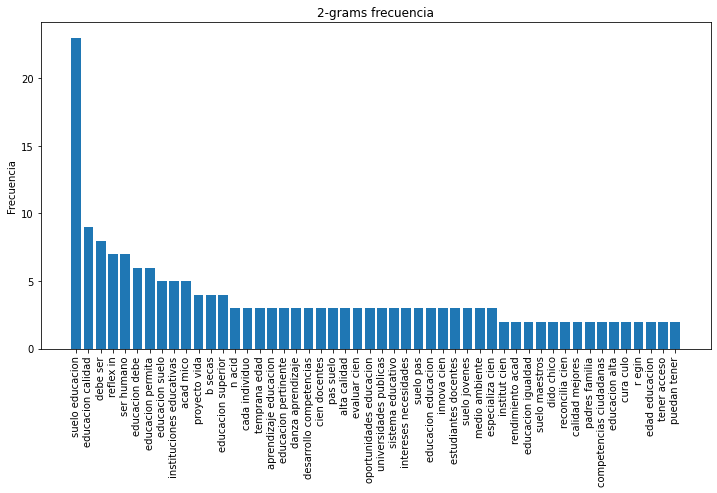

In [152]:
plt.figure(figsize=(12,6))
plt.bar(df_n_grams.index, df_n_grams.Conteo)
plt.xticks(rotation=90)
plt.title('2-grams frecuencia')
#plt.xlabel('2-grams')
plt.ylabel('Frecuencia')
plt.show()

In [153]:
df_n_grams=plot_ngrams(df_cleaned_t, 'sueno', 3, 50)
df_n_grams.head()

,Conteo
educacion debe ser,3
suelo educacion calidad,2
suelo educacion permita,2
educacion alta calidad,2
suelo educacion alta,2


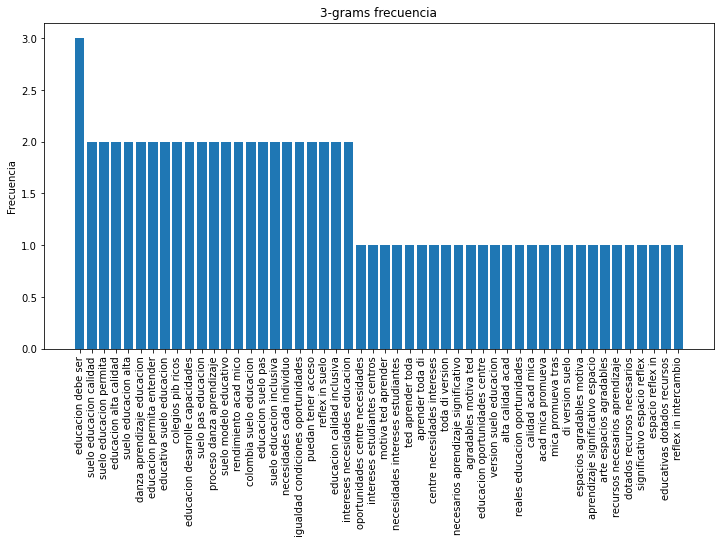

In [154]:
plt.figure(figsize=(12,6))
plt.bar(df_n_grams.index, df_n_grams.Conteo)
plt.xticks(rotation=90)
plt.title('3-grams frecuencia')
#plt.xlabel('2-grams')
plt.ylabel('Frecuencia')
plt.show()